In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Sequence modelling 

## Coding tutorials
 #### [1.  The IMDb dataset](#coding_tutorial_1)
 #### [2. Padding and masking sequence data](#coding_tutorial_2)
 #### [3. The Embedding layer](#coding_tutorial_3)
 #### [4. The Embedding Projector](#coding_tutorial_4)
 #### [5. Recurrent neural network layers](#coding_tutorial_5)
 #### [6. Stacked RNNs and the Bidirectional wrapper](#coding_tutorial_6)

***
<a id="coding_tutorial_1"></a>
## The IMDb Dataset

#### Load the IMDB review sentiment dataset

In [3]:
# Import imdb

import tensorflow.keras.datasets.imdb as imdb

In [4]:
# Download and assign the data set using load_data()

(x_train, y_train), (x_test, y_test) = imdb.load_data()

17465344/17464789 [==============================] - 0s 0us/step


#### Inspect the dataset

In [5]:
# Inspect the type of the data

type(x_train)

numpy.ndarray

In [6]:
# Inspect the shape of the data

x_train.shape

(25000,)

In [7]:
# Display the first dataset element input
# Notice encoding

x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [8]:
# Display the first dataset element output

y_train[0]

1

#### Load dataset with different options

In [ ]:
# Load the dataset with defaults

omdb.load_dataset(path='imdb.npz',
                 index_from=3)
# ~/.keras/dataset/

In [ ]:
# Limit the vocabulary to the top 500 words using num_words

imdb.load_dataset(num_words=1000)

In [ ]:
# Ignore the top 10 most frequent words using skip_top

imdb.load_dataset(skip_top=10, num_words=1000, oov_len=2)

In [ ]:
# Limit the sequence lengths to 500 using maxlen

imdb.load_dataset(maxlen=500)

In [ ]:
# Use '1' as the character that indicates the start of a sequence

imdb.load_dataset(start_char=1)

#### Explore the dataset word index

In [9]:
# Load the imdb word index using get_word_index()

imdb_word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [10]:
# View the word index as a dictionary,
# accounting for index_from.

index_from = 3
imdb_word_index = {key:value + index_from for key, value in imdb_word_index.items()}

In [11]:
# Retrieve a specific word's index

imdb_word_index['simpsonian']

52256

In [15]:
# View an input sentence

inv_imdb_word_index = {value:key for key, value in imdb_word_index.items()}
[inv_imdb_word_index[index] for index in x_train[0] if index > index_from ]

['this',
 'film',
 'was',
 'just',
 'brilliant',
 'casting',
 'location',
 'scenery',
 'story',
 'direction',
 "everyone's",
 'really',
 'suited',
 'the',
 'part',
 'they',
 'played',
 'and',
 'you',
 'could',
 'just',
 'imagine',
 'being',
 'there',
 'robert',
 "redford's",
 'is',
 'an',
 'amazing',
 'actor',
 'and',
 'now',
 'the',
 'same',
 'being',
 'director',
 "norman's",
 'father',
 'came',
 'from',
 'the',
 'same',
 'scottish',
 'island',
 'as',
 'myself',
 'so',
 'i',
 'loved',
 'the',
 'fact',
 'there',
 'was',
 'a',
 'real',
 'connection',
 'with',
 'this',
 'film',
 'the',
 'witty',
 'remarks',
 'throughout',
 'the',
 'film',
 'were',
 'great',
 'it',
 'was',
 'just',
 'brilliant',
 'so',
 'much',
 'that',
 'i',
 'bought',
 'the',
 'film',
 'as',
 'soon',
 'as',
 'it',
 'was',
 'released',
 'for',
 'retail',
 'and',
 'would',
 'recommend',
 'it',
 'to',
 'everyone',
 'to',
 'watch',
 'and',
 'the',
 'fly',
 'fishing',
 'was',
 'amazing',
 'really',
 'cried',
 'at',
 'the',


In [16]:
# Get the sentiment value

y_train[0]

1

---
<a id="coding_tutorial_2"></a>
## Padding and Masking Sequence Data

In [17]:
# Load the imdb data set

import tensorflow.keras.datasets.imdb as imdb

#### Preprocess the data with padding

In [18]:
# Inspect the input data shape

x_train.shape
y_train.shape

(25000,)

In [24]:
# Pad the inputs to the maximum length using maxlen

from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_x_train = pad_sequences(x_train, maxlen=300, padding='post', truncating='pre')

In [25]:
# Inspect the output data shape

padded_x_train.shape

(25000, 300)

#### Create a Masking layer

In [26]:
# Import numpy 

import numpy as np

In [27]:
# Masking expects to see (batch, sequence, features)
# Create a dummy feature dimension using expand_dims

np.expand_dims(padded_x_train, -1)

array([[[   1],
        [  14],
        [  22],
        ...,
        [   0],
        [   0],
        [   0]],

       [[   1],
        [ 194],
        [1153],
        ...,
        [   0],
        [   0],
        [   0]],

       [[   1],
        [  14],
        [  47],
        ...,
        [   0],
        [   0],
        [   0]],

       ...,

       [[   1],
        [  11],
        [   6],
        ...,
        [   0],
        [   0],
        [   0]],

       [[   1],
        [1446],
        [7079],
        ...,
        [   0],
        [   0],
        [   0]],

       [[   1],
        [  17],
        [   6],
        ...,
        [   0],
        [   0],
        [   0]]], dtype=int32)

In [32]:
# Create a Masking layer 
from tensorflow.keras.layers import Masking

tf_x_train = tf.convert_to_tensor(padded_x_train, dtype='float32')
masking_layer = Masking(mask_value=0.0)

In [33]:
# Pass tf_x_train to it

masked_x_train = masking_layer(tf_x_train)

In [37]:
# Look at the dataset

tf_x_train

<tf.Tensor: id=2, shape=(25000, 300), dtype=float32, numpy=
array([[1.000e+00, 1.400e+01, 2.200e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.940e+02, 1.153e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.400e+01, 4.700e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.000e+00, 1.100e+01, 6.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.446e+03, 7.079e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 1.700e+01, 6.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]], dtype=float32)>

In [41]:
# Look at the ._keras_mask for the dataset

masked_x_train._keras_mask

<tf.Tensor: id=10, shape=(25000,), dtype=bool, numpy=array([ True,  True,  True, ...,  True,  True,  True])>

***
<a id="coding_tutorial_3"></a>
## The Embedding layer

#### Create and apply an `Embedding` layer

In [6]:
# Create an embedding layer using layers.Embedding
# Specify input_dim, output_dim, input_length
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(501, 16)


In [7]:
# Inspect an Embedding layer output for a fixed input
# Expects an input of shape (batch, sequence, feature)

sequence_of_indecies = tf.constant([[[0], [1], [5], [500]]])
sequence_of_embeddings = embedding_layer(sequence_of_indecies)
sequence_of_embeddings

<tf.Tensor: id=30, shape=(1, 4, 1, 16), dtype=float32, numpy=
array([[[[-0.02553335,  0.00054533,  0.04414311, -0.03183573,
          -0.03589604,  0.02054652, -0.02883681,  0.03207921,
          -0.03812184,  0.01532033, -0.01895115, -0.04050044,
           0.01895284, -0.02408979, -0.03228807, -0.02257245]],

        [[-0.04924159,  0.04048951,  0.00722295, -0.02496958,
           0.02843193,  0.02686744, -0.00962526,  0.0316262 ,
           0.01061643, -0.02398636,  0.03478717,  0.0253082 ,
           0.01367849, -0.04074285,  0.00639844, -0.01141604]],

        [[ 0.03941475, -0.02376289, -0.03404075,  0.02320423,
           0.00611577,  0.01669052, -0.03215756,  0.02687203,
          -0.04819964,  0.03042025,  0.00902434, -0.03310053,
           0.01532806,  0.00860463, -0.02399932, -0.01626829]],

        [[-0.02523706,  0.02561695, -0.00354822, -0.01955683,
          -0.00806709, -0.01928774,  0.00129412, -0.01230165,
           0.02747   , -0.03524842, -0.02349098, -0.03080076,

In [8]:
# Inspect the Embedding layer weights using get_weights()

embedding_layer.get_weights()[0]

array([[-0.02553335,  0.00054533,  0.04414311, ..., -0.02408979,
        -0.03228807, -0.02257245],
       [-0.04924159,  0.04048951,  0.00722295, ..., -0.04074285,
         0.00639844, -0.01141604],
       [ 0.04666846, -0.03382555,  0.03370125, ...,  0.02906719,
         0.02729794,  0.0243889 ],
       ...,
       [-0.00248767,  0.00576593,  0.02118817, ..., -0.00522073,
        -0.0297352 , -0.02083926],
       [ 0.03773031, -0.01469558,  0.03613489, ..., -0.0207986 ,
        -0.03506138, -0.01286151],
       [-0.02523706,  0.02561695, -0.00354822, ..., -0.03448285,
         0.02988905, -0.00735746]], dtype=float32)

In [10]:
# Get the embedding for the 14th index

embedding_layer.get_weights()[0][14, :]

array([ 0.01059781,  0.00356913,  0.00742234, -0.00030267, -0.04823493,
       -0.01597152, -0.02550333,  0.02571721, -0.00121915, -0.04942889,
        0.01570051, -0.01174816,  0.01909113, -0.04796264, -0.00626352,
        0.04833987], dtype=float32)

#### Create and apply an `Embedding` layer that uses `mask_zero=True`

In [11]:
# Create a layer that uses the mask_zero kwarg

embedding_layer = Embedding(501, 16, mask_zero=True)

In [14]:
# Apply this layer to the sequence and see the _keras_mask property

sequence_of_indecies = tf.constant([[[0], [1], [5], [500]]])
sequence_of_embeddings = embedding_layer(sequence_of_indecies)
sequence_of_embeddings._keras_mask

<tf.Tensor: id=58, shape=(1, 4, 1), dtype=bool, numpy=
array([[[False],
        [ True],
        [ True],
        [ True]]])>

---
<a id="coding_tutorial_4"></a>
## The Embedding Projector

#### Load and preprocess the IMDb data

In [15]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [17]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset()

17465344/17464789 [==============================] - 0s 0us/step


In [18]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [19]:
# Get the word index

imdb_word_index = get_imdb_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [20]:
# Swap the keys and values of the word index

inv_imdb_word_index = {value:key for key, value in imdb_word_index.items()}

In [23]:
# View the first dataset example sentence

[inv_imdb_word_index[index] for index in x_train[100] if index > 2]

['i',
 'am',
 'a',
 'great',
 'fan',
 'of',
 'david',
 'lynch',
 'and',
 'have',
 'everything',
 'that',
 "he's",
 'made',
 'on',
 'dvd',
 'except',
 'for',
 'hotel',
 'room',
 'the',
 '2',
 'hour',
 'twin',
 'peaks',
 'movie',
 'so',
 'when',
 'i',
 'found',
 'out',
 'about',
 'this',
 'i',
 'immediately',
 'grabbed',
 'it',
 'and',
 'and',
 'what',
 'is',
 'this',
 "it's",
 'a',
 'bunch',
 'of',
 'drawn',
 'black',
 'and',
 'white',
 'cartoons',
 'that',
 'are',
 'loud',
 'and',
 'foul',
 'mouthed',
 'and',
 'unfunny',
 'maybe',
 'i',
 "don't",
 'know',
 "what's",
 'good',
 'but',
 'maybe',
 'this',
 'is',
 'just',
 'a',
 'bunch',
 'of',
 'crap',
 'that',
 'was',
 'on',
 'the',
 'public',
 'under',
 'the',
 'name',
 'of',
 'david',
 'lynch',
 'to',
 'make',
 'a',
 'few',
 'bucks',
 'too',
 'let',
 'me',
 'make',
 'it',
 'clear',
 'that',
 'i',
 "didn't",
 'care',
 'about',
 'the',
 'foul',
 'language',
 'part',
 'but',
 'had',
 'to',
 'keep',
 'the',
 'sound',
 'because',
 'my',
 'ne

#### Build an Embedding layer into a model

In [24]:
# Get the maximum token value

max_index_value = max(imdb_word_index.values())

In [25]:
# Specify an embedding dimension

embedding_dim = 16

In [27]:
# Build a model using Sequential:
#     1. Embedding layer
#     2. GlobalAveragePooling1D
#     3. Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

model = Sequential([
    Embedding(max_index_value, embedding_dim, mask_zero=False),
    GlobalAveragePooling1D(),
    Dense(1, activation='sigmoid')
])


In [ ]:
# Functional API refresher: use the Model to build the same model



In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 160,017
Trainable params: 160,017
Non-trainable params: 0
_________________________________________________________________


#### Compile, train, and evaluate the model

In [29]:
# Compile the model with a binary cross-entropy loss

model.compile(
    loss = 'binary_crossentropy',
    metrics = ['accuracy'],
    optimizer = 'adam'
)

In [30]:
# Train the model using .fit(), savng its history

history = model.fit(x_train, y_train, epochs=5, batch_size=12, validation_data=(x_test, y_test), validation_steps=20)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 63s 3ms/sample - loss: 0.6828 - accuracy: 0.5871 - val_loss: 0.0063 - val_accuracy: 0.7625
Epoch 2/5
25000/25000 [==============================] - 61s 2ms/sample - loss: 0.6156 - accuracy: 0.7526 - val_loss: 0.0052 - val_accuracy: 0.8083
Epoch 3/5
25000/25000 [==============================] - 61s 2ms/sample - loss: 0.5221 - accuracy: 0.8156 - val_loss: 0.0043 - val_accuracy: 0.8250
Epoch 4/5
25000/25000 [==============================] - 61s 2ms/sample - loss: 0.4445 - accuracy: 0.8483 - val_loss: 0.0037 - val_accuracy: 0.8625
Epoch 5/5
25000/25000 [==============================] - 60s 2ms/sample - loss: 0.3866 - accuracy: 0.8678 - val_loss: 0.0033 - val_accuracy: 0.8458


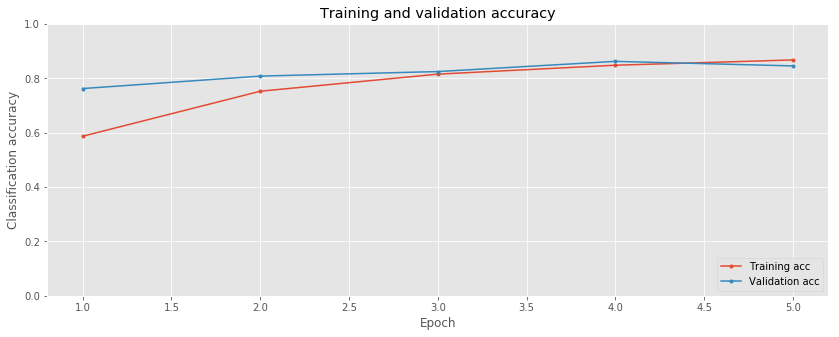

In [31]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### The TensorFlow embedding projector

The Tensorflow embedding projector can be found [here](https://projector.tensorflow.org/).

In [33]:
# Retrieve the embedding layer's weights from the trained model

weights = model.layers[1].get_weights()[0]

IndexError: list index out of range

In [35]:
# Save the word Embeddings to tsv files
# Two files: 
#     one contains the embedding labels (meta.tsv),
#     one contains the embeddings (vecs.tsv)

import io
from os import path

out_v = io.open(path.join('data', 'vecs.tsv'), 'w', encoding='utf-8')
out_m = io.open(path.join('data', 'meta.tsv'), 'w', encoding='utf-8')

k = 0

for word, token in word_index.items():
    if k != 0:
        out_m.write('\n')
        out_v.write('\n')
    
    out_v.write('\t'.join([str(x) for x in weights[token]]))
    out_m.write(word)
    k += 1
    
out_v.close()
out_m.close()
# beware large collections of embeddings!

FileNotFoundError: [Errno 2] No such file or directory: 'data/vecs.tsv'

---
<a id="coding_tutorial_5"></a>
## Recurrent neural network layers

#### Initialize and pass an input to a SimpleRNN layer

In [29]:
# Create a SimpleRNN layer and test it

from tensorflow.keras.layers import SimpleRNN, Dense, Embedding, LSTM, Bidirectional, GRU

simplernn_layer = SimpleRNN(16)

In [3]:
# Note that only the final cell output is returned

sequence = tf.constant([[[1., 1.], [2., 2.], [56., -100.]]])
layer_output = simplernn_layer(sequence)
layer_output

<tf.Tensor: id=118, shape=(1, 16), dtype=float32, numpy=
array([[-1.        , -1.        , -1.        ,  1.        , -1.        ,
         1.        ,  1.        , -1.        ,  1.        ,  1.        ,
        -0.99870473, -0.99997866,  1.        , -0.91787875,  0.997392  ,
         1.        ]], dtype=float32)>

#### Load and transform the IMDB review sentiment dataset

In [4]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [5]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset(maxlen=250)

17465344/17464789 [==============================] - 0s 0us/step


In [6]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [7]:
# Get the word index using get_imdb_word_index()

imdb_word_index = get_imdb_word_index()

1646592/1641221 [==============================] - 0s 0us/step


#### Create a recurrent neural network model

In [9]:
# Get the maximum index value

max_index_value = max(imdb_word_index.values())
embedding_dim = 16

In [13]:
# Using Sequential, build the model:
# 1. Embedding.
# 2. LSTM.
# 3. Dense.

from tensorflow.keras.models import Sequential

model = Sequential([
    Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=True),
    LSTM(16),
    Dense(1, activation='sigmoid')
])

#### Compile and fit the model

In [14]:
# Compile the model with binary cross-entropy loss

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [16]:
# Fit the model and save its training history

history = model.fit(x_train, y_train, epochs=3, batch_size=32, )

Train on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 637s 25ms/sample - loss: 0.1420 - accuracy: 0.9502
Epoch 2/3
25000/25000 [==============================] - 568s 23ms/sample - loss: 0.1210 - accuracy: 0.9586
Epoch 3/3
25000/25000 [==============================] - 491s 20ms/sample - loss: 0.0877 - accuracy: 0.9724


#### Plot learning curves

In [ ]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### Make predictions with the model

In [17]:
# View the first test data example sentence
# (invert the word index)

inv_imdb_word_index = {value: key for key, value in imdb_word_index.items()}
[inv_imdb_word_index[index] for index in x_test[100] if index > 2]

['hunt',
 'scores',
 'a',
 'coup',
 'with',
 'her',
 'directorial',
 'debut',
 'driver',
 'and',
 'david',
 'duchovny',
 'have',
 'that',
 'something',
 'called',
 'chemistry',
 'sure',
 'the',
 'plot',
 'is',
 'unlikely',
 'but',
 'that',
 "doesn't",
 'stop',
 'one',
 'from',
 'enjoying',
 'this',
 'film',
 'does',
 'a',
 'great',
 'job',
 'as',
 'grandfather',
 'other',
 'great',
 'character',
 'actors',
 'play',
 'his',
 'card',
 'buddies',
 'jim',
 'belushi',
 'is',
 'hilarious',
 'as',
 'the',
 'down',
 'to',
 'earth',
 'husband',
 'of',
 'part',
 'of',
 'the',
 'extended',
 'family',
 'br',
 'br',
 'faith',
 'family',
 'and',
 'marriage',
 'are',
 'respected',
 'a',
 'few',
 'sexual',
 'references',
 'and',
 'words',
 'are',
 'used',
 'but',
 'in',
 'context',
 'and',
 'with',
 'gentle',
 'humor',
 'br',
 'br',
 'and',
 'in',
 'the',
 'background',
 'that',
 'wonderful',
 'dean',
 'martin',
 'tune',
 'return',
 'to',
 'me',
 'br',
 'br',
 'recommended']

In [18]:
# Get the model prediction using model.predict()

model.predict(x_test[None, 0, :])

array([[0.99859697]], dtype=float32)

In [19]:
# Get the corresponding label

y_test[0]

1

---
<a id="coding_tutorial_6"></a>
## Stacked RNNs and the Bidirectional wrapper

#### Load and transform the IMDB review sentiment dataset

In [20]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [26]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset(num_words=5000, maxlen=250)

In [22]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [27]:
# Get the word index using get_imdb_word_index()

imdb_word_index = get_imdb_word_index(num_words=5000)

#### Build stacked and bidirectional recurrent models

In [24]:
# Get the maximum index value and specify an embedding dimension

max_index_value = max(imdb_word_index.values())
embedding_dim = 16

In [28]:
# Using Sequential, build a stacked LSTM model via return_sequences=True

model = Sequential([
    Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=True),
    LSTM(32, return_sequences=True),
    LSTM(32, return_sequences=False),
    Dense(1, activation='sigmoid')
])

In [30]:
# Using Sequential, build a bidirectional RNN with merge_mode='sum'

model = Sequential([
    Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=True),
    Bidirectional(layer=LSTM(8), merge_mode='sum',
                 backward_layer =GRU(8, go_backwards=True)),
    Dense(1, activation='sigmoid')
])

In [33]:
# Create a model featuring both stacked recurrent layers and a bidirectional layer

model = Sequential([
    Embedding(input_dim=max_index_value+1, output_dim=embedding_dim, mask_zero=True),
    Bidirectional(layer=LSTM(8, return_sequences=True), merge_mode='concat',
                 backward_layer =GRU(8, go_backwards=True, return_sequences=True)),
    GRU(8, return_sequences=False),
    Dense(1, activation='sigmoid')
])

#### Compile and fit the model

In [34]:
# Compile the model

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [35]:
# Train the model, saving its history

history = model.fit(x_train, y_train, epochs=3, batch_size=32, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 9709 samples
Epoch 1/3
25000/25000 [==============================] - 1664s 67ms/sample - loss: 0.3854 - accuracy: 0.8180 - val_loss: 0.3182 - val_accuracy: 0.8649
Epoch 2/3
25000/25000 [==============================] - 1528s 61ms/sample - loss: 0.2349 - accuracy: 0.9091 - val_loss: 0.2708 - val_accuracy: 0.8891
Epoch 3/3
25000/25000 [==============================] - 1679s 67ms/sample - loss: 0.1910 - accuracy: 0.9298 - val_loss: 0.2758 - val_accuracy: 0.8882


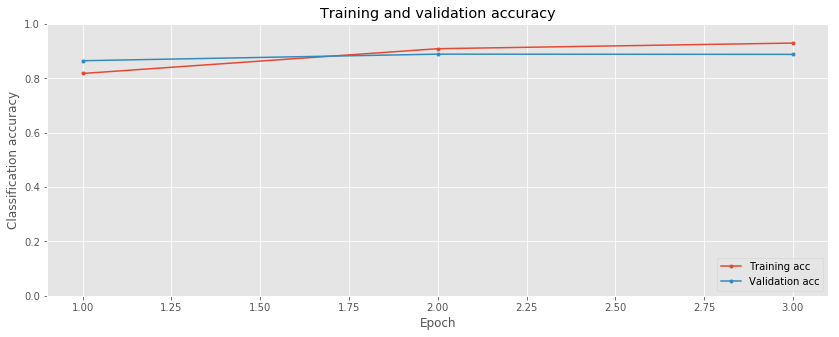

In [36]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);